In [122]:
import matplotlib.pyplot as plt

import math  
import numpy as np
import pandas as pd

import missingno as msno

In [2]:
df = pd.read_csv('datasets/world_development_indicators.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,ARG,"Cause of death, by communicable diseases and m...",SH.DTH.COMM.ZS,NaN,NaN,NaN,NaN,NaN,14.100000,NaN,NaN,NaN,NaN,15.500000,15.900000,NaN,NaN,NaN
1,Argentina,ARG,"Cause of death, by non-communicable diseases (...",SH.DTH.NCOM.ZS,NaN,NaN,NaN,NaN,NaN,79.900000,NaN,NaN,NaN,NaN,78.100000,77.600000,NaN,NaN,NaN
2,Argentina,ARG,"Current health expenditure per capita, PPP (cu...",SH.XPD.CHEX.PP.CD,1054.158183,1152.433128,1284.805319,1357.239137,1497.086996,1578.882089,1647.832709,1645.788348,1689.139315,1631.143137,1808.946147,1531.038361,NaN,NaN,NaN
3,Argentina,ARG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,4.000000,NaN,NaN,NaN,NaN,4.500000,4.500000,4.700000,4.900000,5.000000,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,18.735000,18.596000,18.469000,18.355000,18.252000,18.154000,18.055000,17.949000,17.831000,17.698000,17.548000,17.383000,17.205,NaN,NaN


In [4]:
len(df['Country Name'].unique())

267

In [54]:
df.replace('United States', 'US', inplace = True)
df.replace('Korea, Rep.', 'Korea, South', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Bahamas, The', 'Bahamas', inplace = True)
df.replace('Myanmar', 'Burma', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Czech Republic', 'Czechia', inplace = True)
df.replace('Syrian Arab Republic', 'Syria', inplace = True)
df.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis', inplace = True)
df.replace('St. Lucia', 'Saint Lucia', inplace = True)
df.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines', inplace = True)
df.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace = True)
df.replace('Lao PDR', 'Laos', inplace = True)
df.replace('Slovak Republic', 'Slovakia', inplace = True)
df.replace('Gambia, The', 'Gambia', inplace = True)
df.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)', inplace = True)
df.replace('Congo, Rep.', 'Congo (Brazzaville)', inplace = True)
df.replace('Brunei Darussalam', 'Brunei', inplace = True)


In [55]:
df_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [56]:
df_covid = df_covid.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
176,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,107,107,119,119,135,135,143,146,153,155
177,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,153,163,174,188,203,212,218,233,237,240
178,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,84,91,98,109,116,119,134,161,194,217
179,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,16,22,28,29,35,35,36,39,39,39
180,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,...,3,5,7,7,7,8,8,9,9,9


In [57]:
common = set(df_covid['Country/Region'].unique()).intersection(set(df['Country Name'].unique()))

In [58]:
set(df_covid['Country/Region'].unique()) - common

{'Diamond Princess', 'Holy See', 'MS Zaandam', 'Taiwan*'}

In [53]:
# set(df['Country Name'].unique()) - common

In [117]:
lol = []
cols = []
for country in common:
    temp = df[df['Country Name'] == country].reset_index()
    temp_vals = temp[df.columns[4:]]
    temp['Latest'] = temp_vals.ffill(axis=1).iloc[:, -1]
    t= temp[['Country Name', 'Series Name', 'Latest']].pivot(index='Country Name', 
                                                          columns='Series Name', values='Latest').reset_index()
    cols = list(t.columns)
    lol.append(list(t.loc[0]))
    

In [119]:
df_wdi = pd.DataFrame(lol, columns = cols)
df_wdi.head()

,Country Name,"Birth rate, crude (per 1,000 people)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by non-communicable diseases (% of total)","Current health expenditure per capita, PPP (current international $)","Death rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)","International tourism, number of arrivals","International tourism, number of departures","Life expectancy at birth, total (years)",...,"Out-of-pocket expenditure per capita, PPP (current international $)",People using at least basic sanitation services (% of population),People using safely managed sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),"Population, total","Smoking prevalence, total (ages 15+)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,Azerbaijan,14.600,8.8,86.6,1193.058830,5.800,4.7,2633000.0,3919000.0,72.693,...,941.547524,92.511445,NaN,83.241300,6.195183,120.265320,9942334.0,20.8,83.810919,74.378292
1,Armenia,14.298,2.8,93.3,876.856857,9.862,4.2,1652000.0,1623000.0,74.797,...,707.158349,93.642307,48.223167,94.042941,11.253818,103.680225,2951776.0,24.1,88.135315,72.735522
2,Rwanda,32.062,42.4,44.0,130.380629,5.308,1.6,932000.0,NaN,68.341,...,8.312360,66.573842,NaN,4.617278,2.938196,498.659870,12301939.0,12.3,74.571906,66.412498
3,Albania,11.934,2.9,93.1,759.666984,7.714,2.9,5340000.0,5415000.0,78.333,...,440.461765,97.718368,39.855450,NaN,13.744736,104.612263,2866376.0,28.7,91.145395,84.702788
4,Malaysia,16.867,17.5,73.6,1052.547580,5.014,1.9,25832000.0,NaN,75.828,...,395.714163,99.572036,88.633912,NaN,6.671755,95.962821,31528585.0,21.5,86.616396,76.317395


In [120]:
df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 23 columns):
Country Name                                                                                             177 non-null object
Birth rate, crude (per 1,000 people)                                                                     177 non-null float64
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    169 non-null float64
Cause of death, by non-communicable diseases (% of total)                                                169 non-null float64
Current health expenditure per capita, PPP (current international $)                                     173 non-null float64
Death rate, crude (per 1,000 people)                                                                     177 non-null float64
Hospital beds (per 1,000 people)                                                                         172 non-null float64
International 

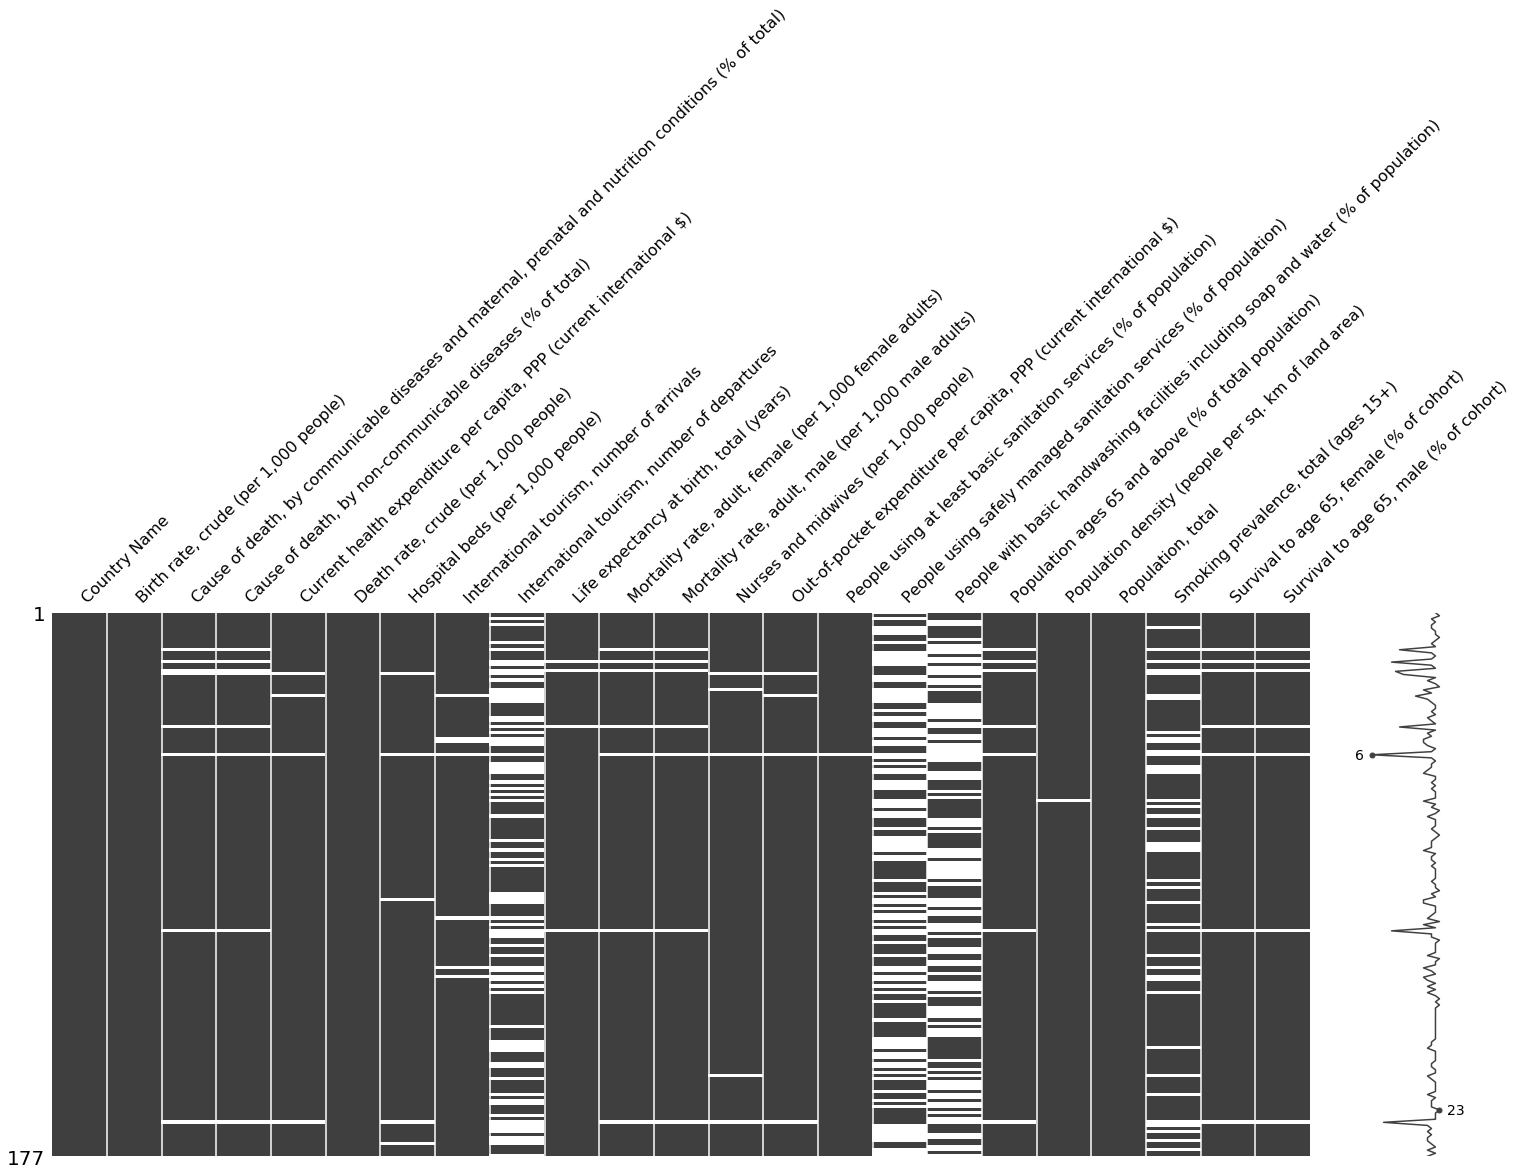

In [124]:
msno.matrix(df_wdi)

In [125]:
df_wdi.isnull().sum()

Country Name                                                                                              0
Birth rate, crude (per 1,000 people)                                                                      0
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)     8
Cause of death, by non-communicable diseases (% of total)                                                 8
Current health expenditure per capita, PPP (current international $)                                      4
Death rate, crude (per 1,000 people)                                                                      0
Hospital beds (per 1,000 people)                                                                          5
International tourism, number of arrivals                                                                 7
International tourism, number of departures                                                              72
Life expectancy at birth, to

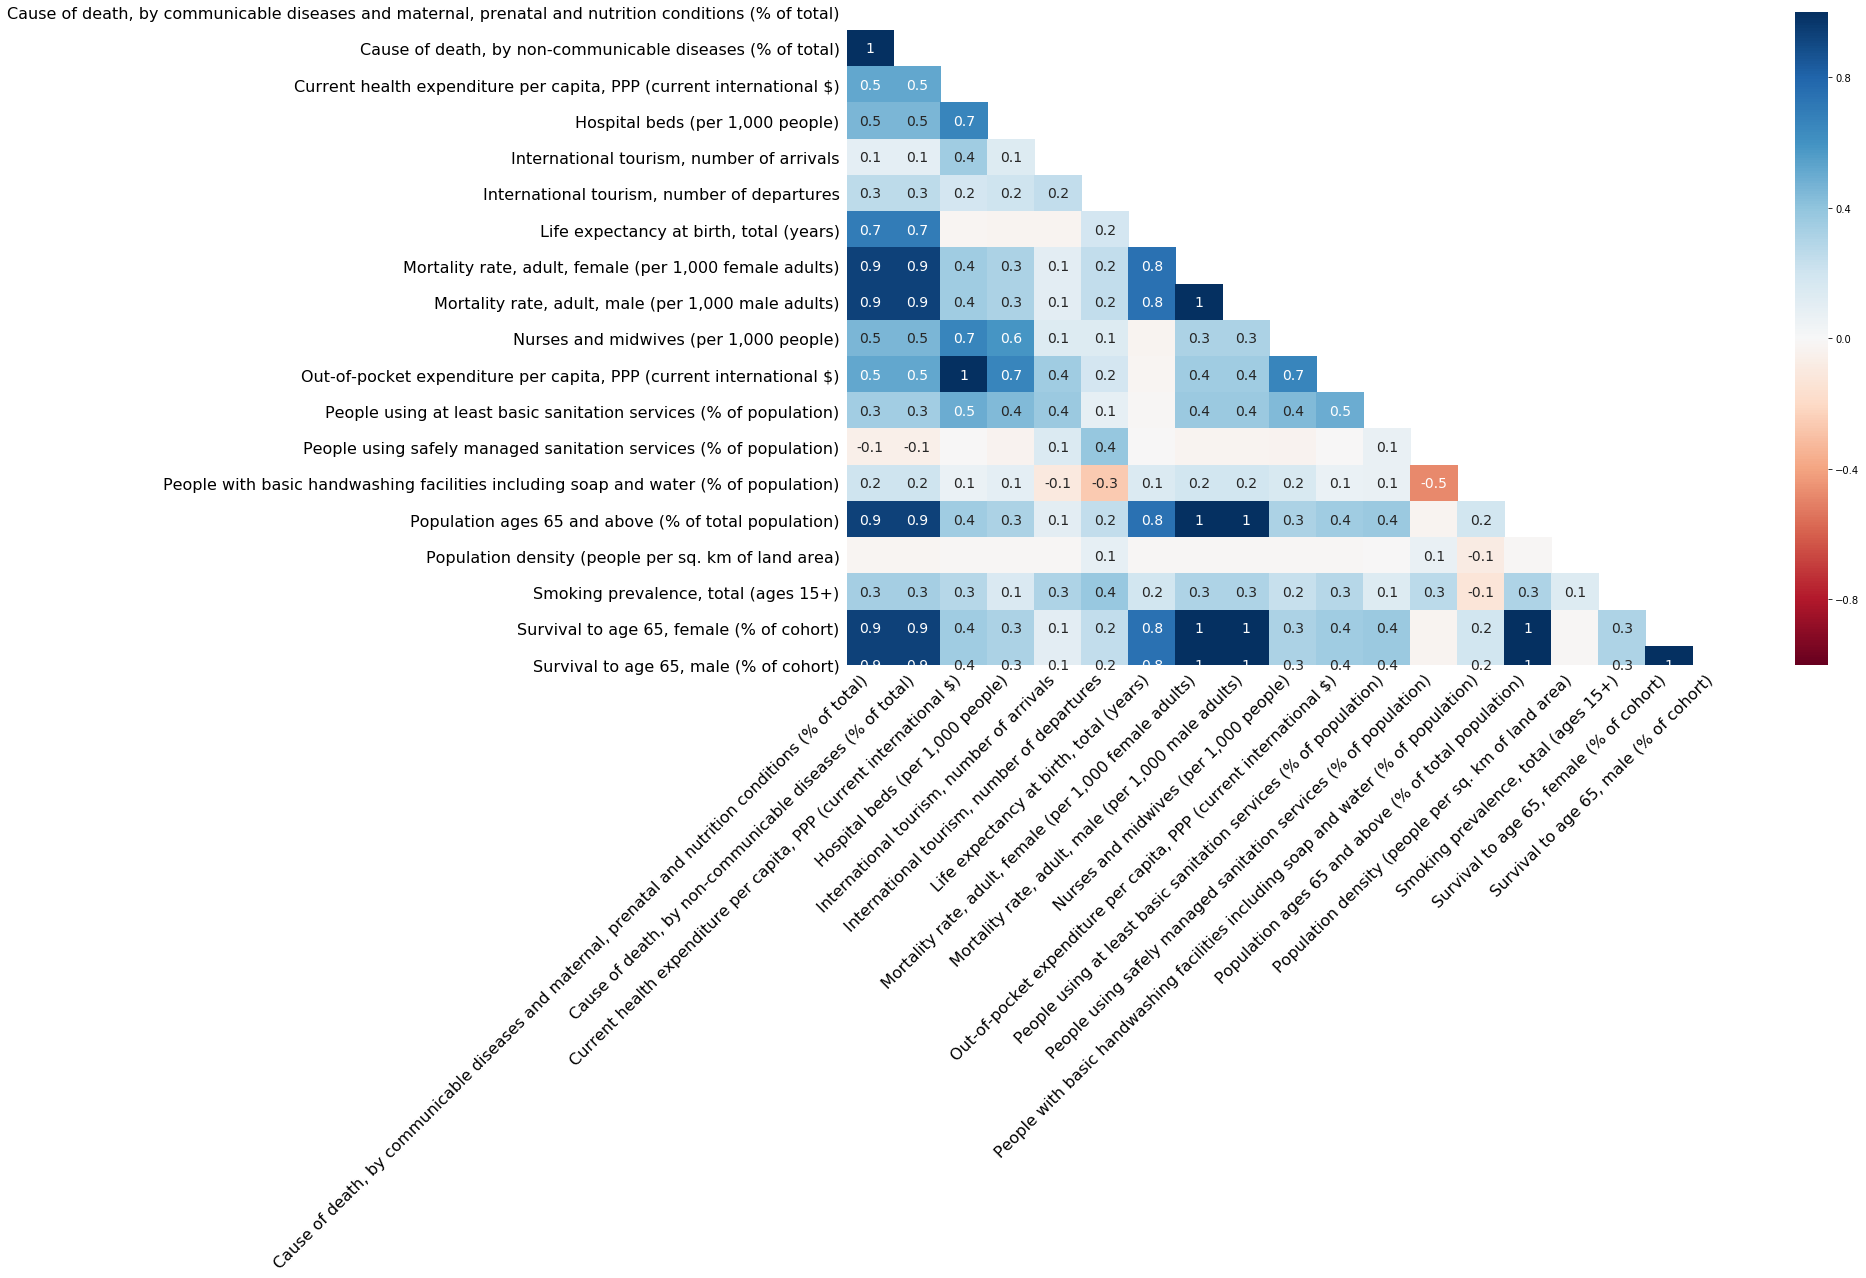

In [127]:
msno.heatmap(df_wdi)

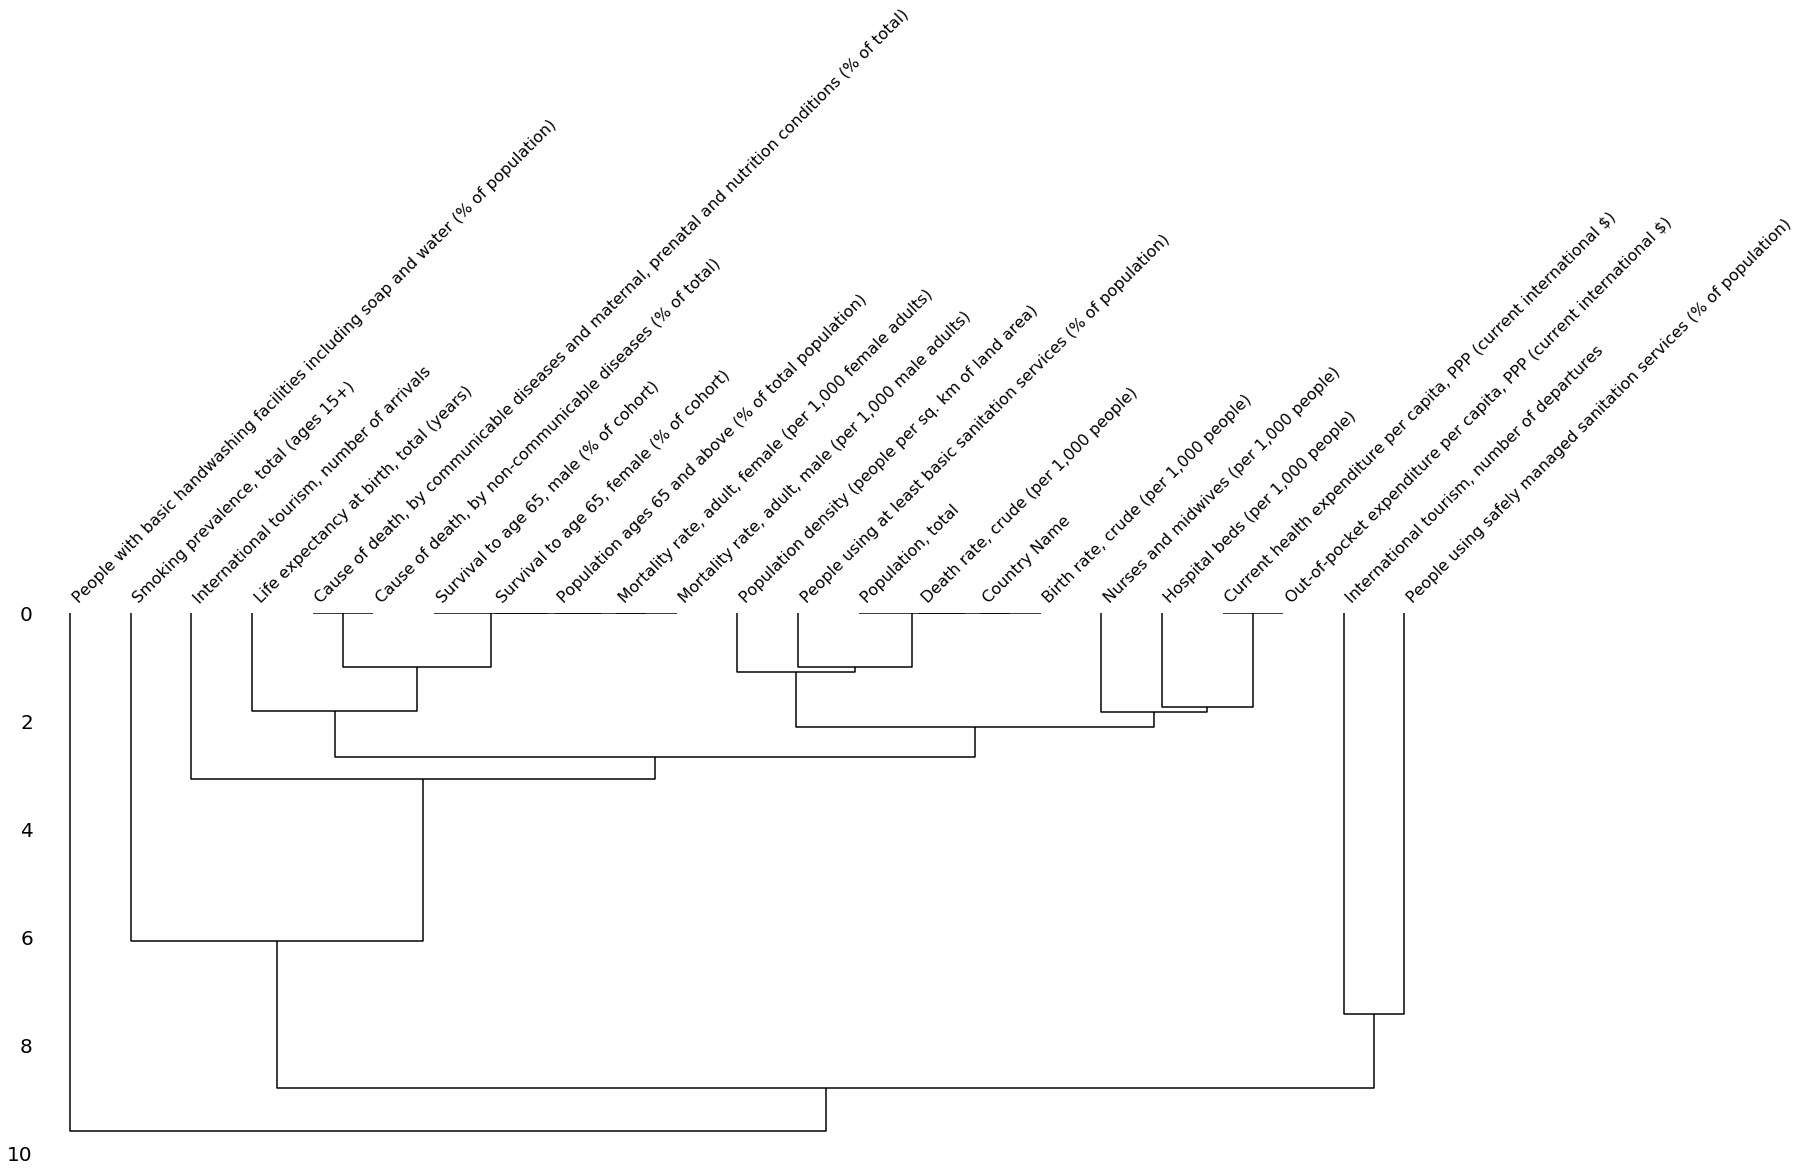

In [126]:
msno.dendrogram(df_wdi)